In [1]:
from learningAgents import ReinforceAlgorithm
from environmentModel import Model, AdversaryModes

In [2]:
game = Model(totalDemand = 400, 
               tupleCosts = (57, 71),
              totalStages = 25,
            initState = [400/2,0], adversaryMode=AdversaryModes.myopic)

In [3]:
game.reset()

(tensor([200.,   0.]), 0, False)

In [4]:
game.adversaryChoosePrice()

135.5

In [5]:
import torch
import torch.nn as nn
from torch.distributions import Categorical

# Hyperparameters
def NeuralNetwork():
    lr = .0009
    num_episodes = 20

    nn_ = 100

    policy = nn.Sequential(
                           nn.Linear(2, nn_), 
                           nn.ReLU(),
                           nn.Linear(nn_,nn_),
                           nn.ReLU(),
                           nn.Linear(nn_,100),                       
                           nn.Softmax(dim=0))
    optim = torch.optim.Adam(policy.parameters(), lr=lr)

    return policy, optim


In [6]:
algorithm = ReinforceAlgorithm(game, NeuralNetwork, numberIterations=100, numberEpisodes=20, discountFactor =0.5)

In [7]:
algorithm.solver()

In [8]:
algorithm.bestAverageRetu

169770.73019404756

In [9]:
import pandas as pd
profits = pd.DataFrame(game.profit).T
prices = pd.DataFrame(game.prices).T
demandPotential = pd.DataFrame(game.demandPotential).T

In [10]:
demandPotential

,0,1
0,200.000000,200.000000
1,218.500000,181.500000
2,218.750000,181.250000
3,218.875000,181.125000
4,218.937500,181.062500
5,218.968750,181.031250
6,218.984375,181.015625
7,218.992188,181.007812
8,218.996094,181.003906
9,218.998047,181.001953


<AxesSubplot:>

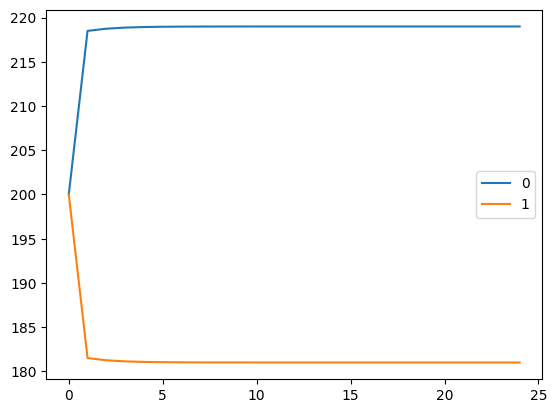

In [11]:
demandPotential.plot()

In [12]:
profits

,0,1
0,4212.250000,4160.250000
1,6376.562500,3052.562500
2,6396.765625,3038.765625
3,6406.878906,3031.878906
4,6411.938477,3028.438477
5,6414.468994,3026.718994
6,6415.734436,3025.859436
7,6416.367203,3025.429703
8,6416.683598,3025.214848
9,6416.841798,3025.107423


In [13]:
profits.sum(axis=0)

0    151722.333343
1     73790.333327
dtype: float64

<AxesSubplot:>

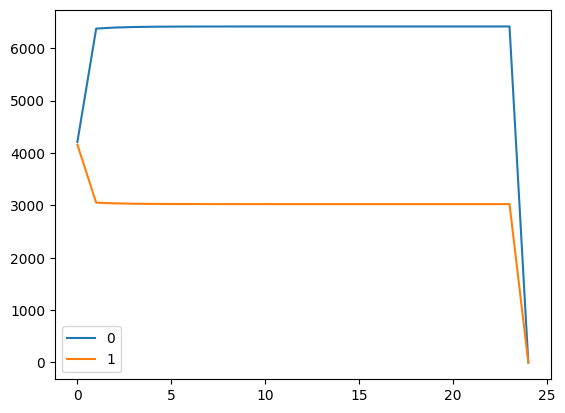

In [14]:
profits.plot()

In [15]:
prices

,0,1
0,98.500000,135.500000
1,125.750000,126.250000
2,125.875000,126.125000
3,125.937500,126.062500
4,125.968750,126.031250
5,125.984375,126.015625
6,125.992188,126.007812
7,125.996094,126.003906
8,125.998047,126.001953
9,125.999023,126.000977


<AxesSubplot:>

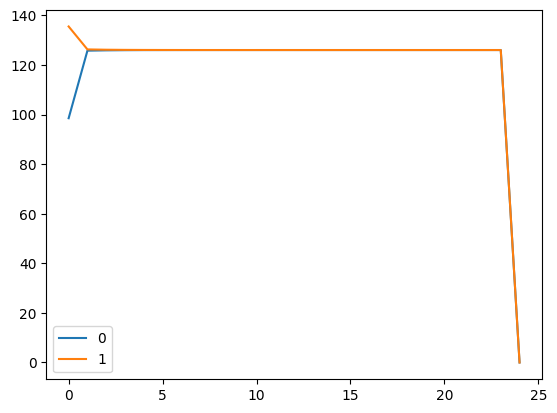

In [16]:
prices.plot()

<AxesSubplot:>

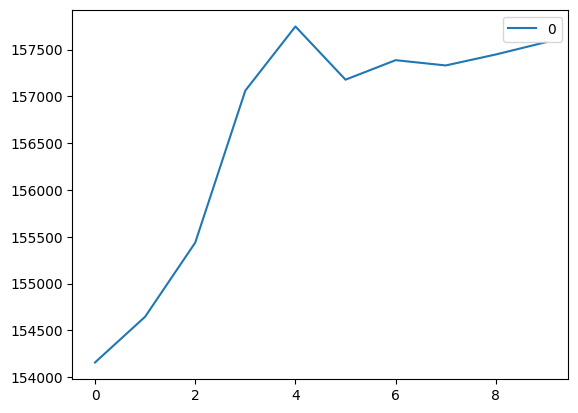

In [20]:
learning.plot()